## Import Library

In [124]:
#Aljabar Linear
import numpy as np

#Dataframe
import pandas as pd

#plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Quandl
import quandl

## Ambil data dari Quandl

In [57]:
df = quandl.get("BITFINEX/BTCUSD", authtoken="C5CQZuxZM7EbJvzMBGhm")
df.tail(3)

,High,Low,Mid,Last,Bid,Ask,Volume
Date,,,,,,,
2019-02-27,3934.0,3761.2,3901.95,3902.0,3901.9,3902.0,11955.109631
2019-02-28,3988.0,3875.0,3895.80,3895.0,3895.7,3895.9,12077.502286
2019-03-01,3949.0,3893.0,3923.05,3923.0,3923.0,3923.1,4708.990573


# Data Preprocessing

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1739 entries, 2014-04-15 to 2019-03-01
Data columns (total 7 columns):
High      1739 non-null float64
Low       1739 non-null float64
Mid       1739 non-null float64
Last      1739 non-null float64
Bid       1739 non-null float64
Ask       1739 non-null float64
Volume    1739 non-null float64
dtypes: float64(7)
memory usage: 108.7 KB


In [59]:
df.isnull().sum()

High      0
Low       0
Mid       0
Last      0
Bid       0
Ask       0
Volume    0
dtype: int64

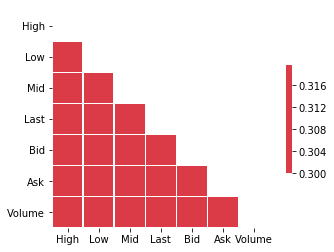

In [60]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(6,4))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [61]:
y =  df['Mid']
x = df[['High','Low']]

In [62]:



from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(x)
x_normalized = pd.DataFrame(np_scaled)
x_normalized.head(3)

,0,1
0,0.025836,0.024272
1,0.027500,0.026581
2,0.027073,0.026104


In [63]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_normalized, y, test_size=0.3, random_state=None)

# Data Processing

In [64]:
from sklearn import linear_model

### Linear Regression

In [65]:
LR_reg = linear_model.LinearRegression()
LR_train = LR_reg.fit(x_train, y_train)

In [66]:
LR_pred = LR_train.predict(x_test)

In [67]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, LR_pred)

10231.511902651917

In [68]:
from sklearn.metrics import r2_score

r2_score(y_test, LR_pred)

0.9991389514068603

### Ridge

In [69]:
RR_reg = linear_model.Ridge(alpha=.5)
RR_train = RR_reg.fit(x_train, y_train)

In [70]:
RR_pred = RR_train.predict(x_test)

In [71]:
mean_squared_error(y_test, RR_pred)

9398.506996456581

In [72]:
r2_score(y_test, LR_pred)

0.9991389514068603

### RidgeCV

In [73]:
RCV_reg = linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0], cv=3)
RCV_train = RCV_reg.fit(x_train, y_train)

In [74]:
RCV_pred = RCV_train.predict(x_test)

In [75]:
mean_squared_error(y_test, RCV_pred)

9642.408496279873

In [76]:
r2_score(y_test, LR_pred)

0.9991389514068603

### Elastic Net

In [85]:
EN_reg = linear_model.ElasticNet(alpha=0.001)
EN_train = EN_reg.fit(x_train, y_train)

In [86]:
EN_pred = EN_train.predict(x_test)

In [87]:
mean_squared_error(y_test, EN_pred)

9457.963830458964

In [88]:
r2_score(y_test, EN_pred)

0.9992040505325442

### Stochastic Gradient Descent

In [93]:
SGD_reg = linear_model.SGDRegressor( alpha=0.0006, max_iter=1000)
SGD_train = SGD_reg.fit(x_train, y_train)

In [94]:
SGD_pred = SGD_train.predict(x_test)

In [95]:
mean_squared_error(y_test, SGD_pred)

9571.851308149542

In [96]:
r2_score(y_test, SGD_pred)

0.9991944661570018

### Theil-Sen Regressor

In [97]:
TR_reg = linear_model.TheilSenRegressor(max_iter=1000,tol=0.9)
TR_train = TR_reg.fit(x_train, y_train)

In [98]:
TR_pred = TR_train.predict(x_test)

In [99]:
mean_squared_error(y_test, TR_pred)

9606.478977053477

In [100]:
r2_score(y_test, SGD_pred)

0.9991944661570018

# Postprocessing

## Compare

LR: 10231.511903
RR: 9398.506996
RCV: 9642.408496
EN: 9457.963830
SGD: 9571.851308
TR: 9606.478977


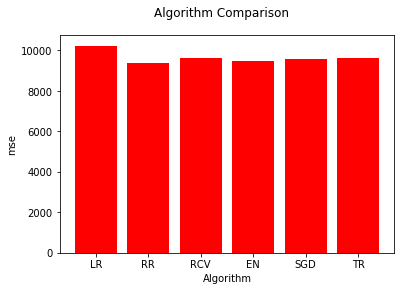

In [131]:
#models
models = []
models.append(('LR', LR_pred))
models.append(('RR', RR_pred))
models.append(('RCV', RCV_pred))
models.append(('EN', EN_pred))
models.append(('SGD', SGD_pred))
models.append(('TR', TR_pred))
              
# evaluate each model in turn
results = []
names = []
scoring = 'mse'
for name, model in models:
    mse_results = mean_squared_error(y_test, model)
    results.append(mse_results)
    names.append(name)
    msg = "%s: %f" % (name, mse_results)
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
plt.ylabel('mse')
plt.xlabel('Algorithm')
plt.bar(names, results, color='red')
ax.set_xticklabels(names)
plt.show()

### Prediksi vs Aktual

In [1]:
prediksi = pd.DataFrame(RR_pred,index=y_test.index,columns = ['price']) 

prediksi.plot(figsize=(15,8),color='red')
y_test.plot(color='darkgreen')

plt.legend(['prediksi','aslinya'])

plt.ylabel('Harga')
plt.xlabel('Tahun')

plt.show()

NameError: name 'pd' is not defined

## Simulasi Jual Beli

In [150]:
aslisim = y_test.tail(60)
prediksisim = prediksi.tail(60)
window= 30

In [147]:
a = aslisim.values
p = prediksisim.values
uang = []
btc = []
modal = 100
for i in range(window):    
    print("Transaksi", i)
    if (i<1):
        uang.append(0)
        u = uang[i]
        beli_btc = modal/a[i]
        btc.append(beli_btc)
    elif (a[i-1]>p[(i-1)] and a[i]<p[i]):
            jual_btc = btc[i-1]*a[i-1] 
            uang.append(jual_btc)
            btc.append(0)
            beli_btc = uang[i]/a[i+1]
            
                
        else:
            uang.append(0)
            btc.append(beli_btc)
    print("harga = ", a[i], "pred = ",p[i], "uang = ", uang[i], "BTC = ", btc[i])
    print("====================================================================")

Transaksi 0
harga =  7126.45 pred =  [7237.81901254] uang =  0 BTC =  0.014032232036988964
Transaksi 1
harga =  8484.65 pred =  [8268.16361312] uang =  0 BTC =  0.014032232036988964
Transaksi 2
harga =  236.275 pred =  [242.97170128] uang =  119.05857755263841 BTC =  0
Transaksi 3
harga =  3710.05 pred =  [3732.61102439] uang =  0 BTC =  0.0320908283049119
Transaksi 4
harga =  2808.55 pred =  [2817.20515324] uang =  0 BTC =  0.0320908283049119
Transaksi 5
harga =  279.455 pred =  [290.8918748] uang =  0 BTC =  0.0320908283049119
Transaksi 6
harga =  5714.95 pred =  [5681.35591711] uang =  0 BTC =  0.0320908283049119
Transaksi 7
harga =  240.95 pred =  [251.04789307] uang =  183.3974792211563 BTC =  0
Transaksi 8
harga =  7649.25 pred =  [7700.34367234] uang =  0 BTC =  0.023975877271779102
Transaksi 9
harga =  257.795 pred =  [265.9115209] uang =  0 BTC =  0.023975877271779102
Transaksi 10
harga =  10860.5 pred =  [10182.55792806] uang =  0 BTC =  0.023975877271779102
Transaksi 11
harg

In [153]:
print("price = ", a[window-1], "pred = ",p[window-1], "M = ", uang[window-1], "BTC = ", btc[window-1])
print("========================================")
print("Profit", (a[window-1]*btc[window-1])-modal )

price =  606.975 pred =  [605.59879881] M =  0 BTC =  1.3951539779189188
Profit 746.8235857473358


## Prediksi harga besok

In [157]:
besok = RR_train.predict(x_test.tail(1))
print(besok)

[651.32728292]
